In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


In [3]:
digits = load_digits()
X = digits.data
y = digits.target
print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (1797, 64)
y shape: (1797,)


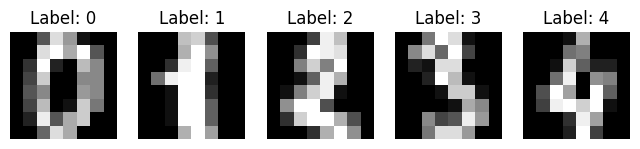

In [4]:
plt.figure(figsize=(8, 4))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(digits.images[i], cmap="gray")
    plt.title(f"Label: {y[i]}")
    plt.axis("off")
plt.show()


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [14]:
from scipy.spatial.distance import cdist
import numpy as np
def knn_predict(X_train, y_train, X_test, k=3):
    distances = cdist(X_test, X_train)
    neighbors = np.argsort(distances, axis=1)[:, :k]
    preds = []
    for i in range(len(neighbors)):
        labels = y_train[neighbors[i]]
        preds.append(np.bincount(labels).argmax())
    return np.array(preds)
y_pred = knn_predict(X_train, y_train, X_test, k=3)
print("Accuracy:", accuracy_score(y_test, y_pred))



Accuracy: 0.9694444444444444


In [15]:
k_values = [3, 5, 7, 9]
accuracies = []
for k in k_values:
    y_pred_k = knn_predict(X_train, y_train, X_test, k=k)
    acc = accuracy_score(y_test, y_pred_k)
    accuracies.append(acc)
    print(f"K={k}, Accuracy={acc}")


K=3, Accuracy=0.9694444444444444
K=5, Accuracy=0.975
K=7, Accuracy=0.9722222222222222
K=9, Accuracy=0.9722222222222222


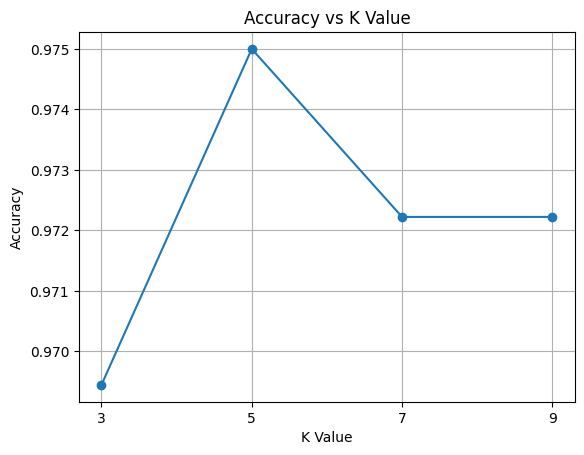

In [16]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(k_values, accuracies, marker='o')
plt.title("Accuracy vs K Value")
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.grid(True)
plt.show()


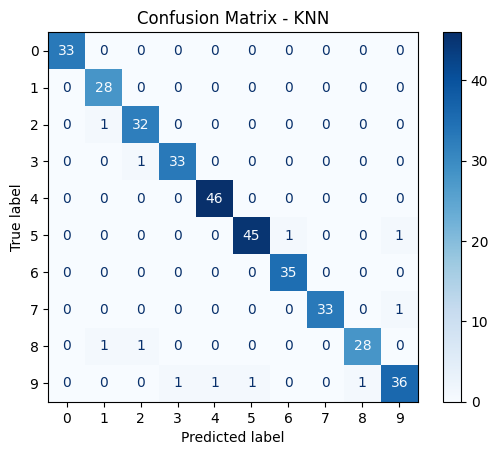

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - KNN")
plt.show()


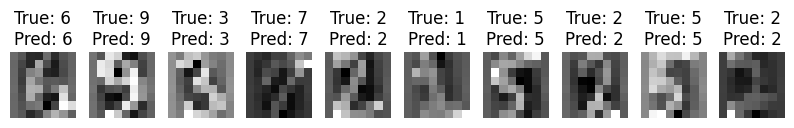

In [22]:
plt.figure(figsize=(10, 4))

for i in range(10):
    plt.subplot(1, 10, i+1)
    
    # Reshape test image back to 8x8
    image = X_test[i].reshape(8, 8)
    
    plt.imshow(image, cmap="gray")
    plt.title(f"True: {y_test[i]}\nPred: {y_pred[i]}")
    plt.axis("off")

plt.show()
